<a href="https://colab.research.google.com/github/Suraj-Btech/Object-Detection-Project/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download COCO class names
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-12-03 05:39:24--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-12-03 05:39:25 (16.9 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
# Download YOLOv3 configuration
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-12-03 05:39:25--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-12-03 05:39:25 (51.0 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
# Download YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-12-03 05:39:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.5MB/s    in 14s     

2024-12-03 05:39:39 (17.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



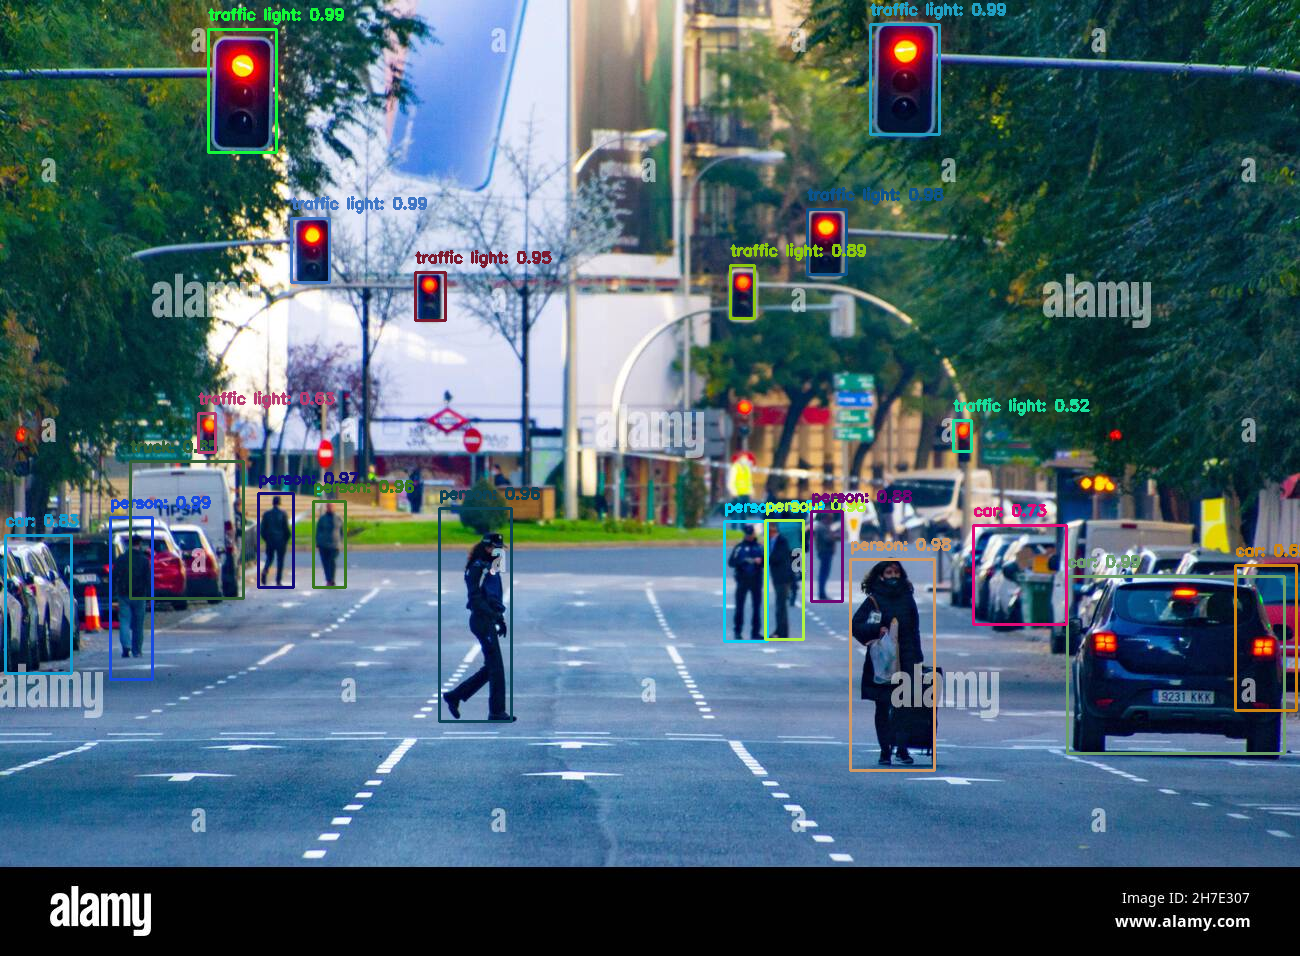

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO
weights_path = "yolov3.weights"
config_path = "yolov3.cfg"
names_path = "coco.names"

# Load class labels
with open(names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load the YOLO network
net = cv2.dnn.readNet(weights_path, config_path)
layer_names = net.getUnconnectedOutLayersNames()

# Load the image
image = cv2.imread("/content/city.jpg")
height, width = image.shape[:2]

# Preprocess the image
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outputs = net.forward(layer_names)

# Process detections
boxes, confidences, class_ids = [], [], []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = [int(c) for c in np.random.uniform(0, 255, size=3)]
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the result
cv2_imshow(image)
